<a href="https://colab.research.google.com/github/erikhhs/ads/blob/main/mini_datalab_antwoorden.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Voorspel of een tumor goedaardig is of kwaadaardig

## Importeren toolset
- De tools die we gebruiken moeten we eerst importeren voordat we ze kunnen gebruiken.
- Voer onderstaande cel uit.

In [36]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
from sklearn import tree as tree_plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import plot_confusion_matrix
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

## 1 Laden van de borstkanker dataset
- 10 kolommen met kenmerken van de tumor.
- 1 kolom waarin staat of de tumor goedaardig is of kwaadaardig (0 = kwaadaardig, 1 = goedaardig). Dit is vastgesteld met een punctie.
- Voer onderstaande cel uit om de dataset te laden en een dataframe ervan te maken.

In [30]:
df = pd.DataFrame(cancer.data, columns = cancer.feature_names)
top10 = ['smoothness error',
 'concavity error',
 'worst smoothness',
 'area error',
 'concave points error',
 'mean texture',
 'worst area',
 'worst radius',
 'worst texture',
 'mean concave points']
df = df[top10]
df['IsBenign'] = cancer.target
display(df)
print( {n: v for n, v in zip(['kwaadaardig', 'goedaardig'], np.bincount(cancer.target))})
print('1 in kolom IsBenign betekent dat de tumor goedaardig is')

,smoothness error,concavity error,worst smoothness,area error,concave points error,mean texture,worst area,worst radius,worst texture,mean concave points,IsBenign
0,0.006399,0.05373,0.16220,153.40,0.01587,10.38,2019.0,25.380,17.33,0.14710,0
1,0.005225,0.01860,0.12380,74.08,0.01340,17.77,1956.0,24.990,23.41,0.07017,0
2,0.006150,0.03832,0.14440,94.03,0.02058,21.25,1709.0,23.570,25.53,0.12790,0
3,0.009110,0.05661,0.20980,27.23,0.01867,20.38,567.7,14.910,26.50,0.10520,0
4,0.011490,0.05688,0.13740,94.44,0.01885,14.34,1575.0,22.540,16.67,0.10430,0
...,...,...,...,...,...,...,...,...,...,...,...
564,0.010300,0.05198,0.14100,158.70,0.02454,22.39,2027.0,25.450,26.40,0.13890,0
565,0.005769,0.03950,0.11660,99.04,0.01678,28.25,1731.0,23.690,38.25,0.09791,0
566,0.005903,0.04730,0.11390,48.55,0.01557,28.08,1124.0,18.980,34.12,0.05302,0
567,0.006522,0.07117,0.16500,86.22,0.01664,29.33,1821.0,25.740,39.42,0.15200,0


{'kwaadaardig': 212, 'goedaardig': 357}
1 in kolom IsBenign betekent dat de tumor goedaardig is


### 1.1 informatie over de dataset
- Toon de informatie van de dataset in onderstaande cel.
- Zijn er ontbrekende waardes?
- Welke datatypes zijn er?

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

## 2 Interview je opdrachtgever
Bereid een interview voor:
- Bestudeer de dataset.
- Schrijf op wat nog niet duidelijk is.
- Maak vragen waarmee je kunt achterhalen welke doelen de opdrachtgever wil behalen.

Interview de opdrachtgever en noteer hier welke doelen de opdrachtgever wil behalen:




## 3 Data analyse
Maak grafieken waarin je het volgende laat zien:
- Het aantal regels dat goedaardig is en het aantal dat kwaadaardig is.
- De informatie die ieder van de 10 kenmerken geeft voor het correct voorspellen van de aard van de tumor (10 grafieken)
- Welk kenmerk geeft de meeste informatie om te kunnen voorspellen of een tumor goed- of kwaadaardig?

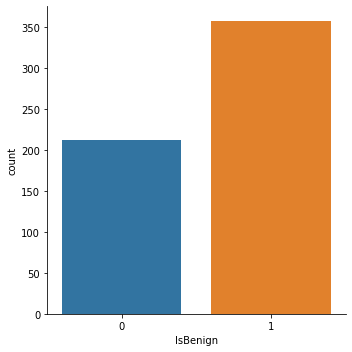

In [8]:
sns.catplot(kind = 'count', x = 'IsBenign', data=df)

In [31]:
def chart_distributions(data,by):
    cols = list(data.columns)
    for col in cols:
        if col != by:
            sns.displot(hue = by , x = col , data=data, kind = 'kde', fill = True)
            plt.show()

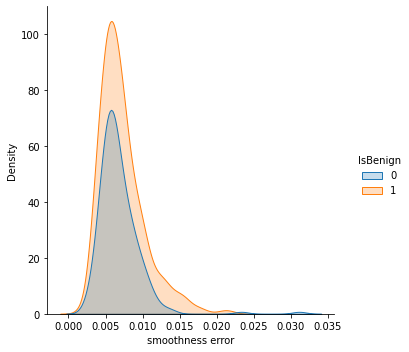

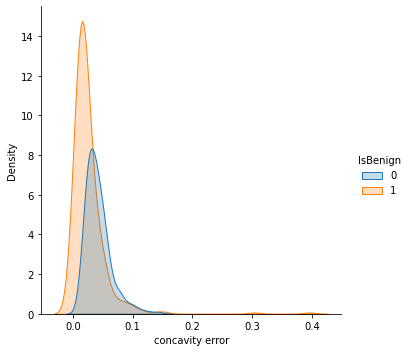

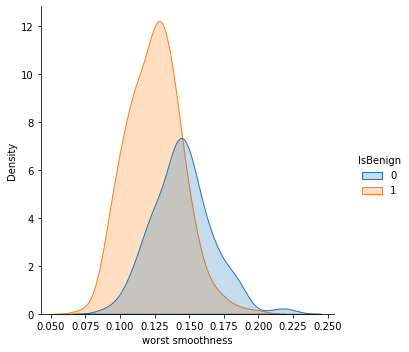

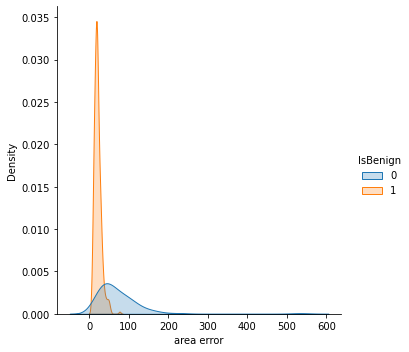

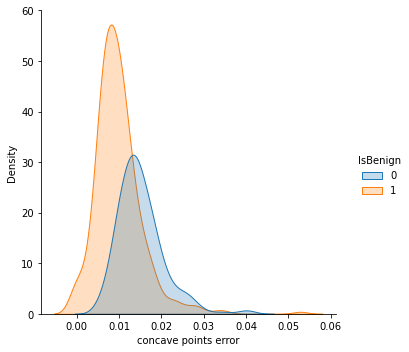

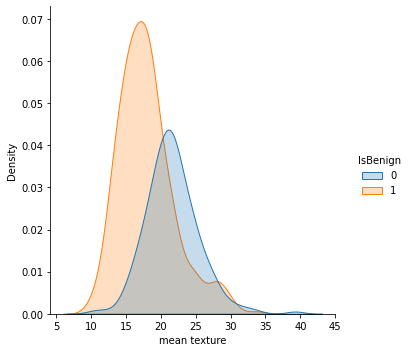

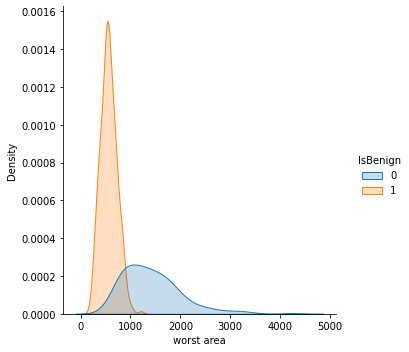

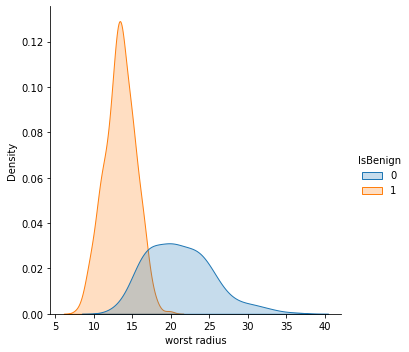

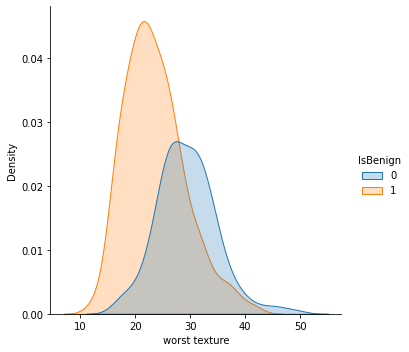

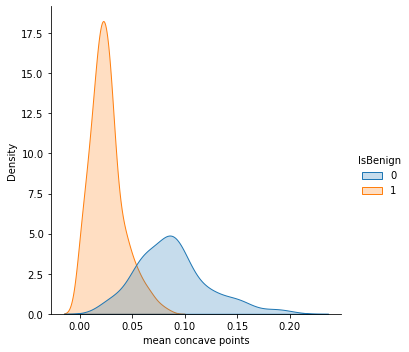

In [32]:
chart_distributions(df,'IsBenign')

## Splitsen in x-variabelen en y-variabele

Met de x-variabelen proberen we de y-variabele zo goed mogelijk te voorspellen.

X-variabelen: de kenmerken van de tumor (mean radius, mean texture etc.).

y-variabele: de klasse die we willen voorspellen. In dit geval kwaadaardig of goedaardig, 0 of 1.

- Splits de data in df in X en y

In [33]:
X = df.drop('IsBenign', axis=1)
y = df['IsBenign']

## Splitsen in training data en test data
De training data gebruiken we om het model te trainen.

De test data gebruiken we om te bepalen hoe goed ons model kan voorspellen.

- Splits de data in X_test, X_train, y_test en y_train


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 42)
print('X_train:', 'Aantal rijen =' ,X_train.shape[0], ',','Aantal kolommen =', X_train.shape[1], )
print('y_train: ', 'Aantal rijen =', y_train.shape[0], ',','Aantal kolommen =', 1 )
print('X_test:', 'Aantal rijen =' ,X_test.shape[0], ',','Aantal kolommen =', X_test.shape[1], )
print('y_test: ', 'Aantal rijen =', y_test.shape[0], ',','Aantal kolommen =', 1 )

X_train: Aantal rijen = 426 , Aantal kolommen = 30
y_train:  Aantal rijen = 426 , Aantal kolommen = 1
X_test: Aantal rijen = 143 , Aantal kolommen = 30
y_test:  Aantal rijen = 143 , Aantal kolommen = 1


## Trainen van het model
- Train een beslisboom met behulp van een DecisionTreeClassifier

In [13]:
tree = DecisionTreeClassifier(random_state = 42)
tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

## Visualisatie van het model
- Visualeer de beslisboom.
- Leg uit aan je opdrachtgever uit hoe deze beslisboom gebruikt kan worden in haar / zijn dagelijkse werkzaamheden.

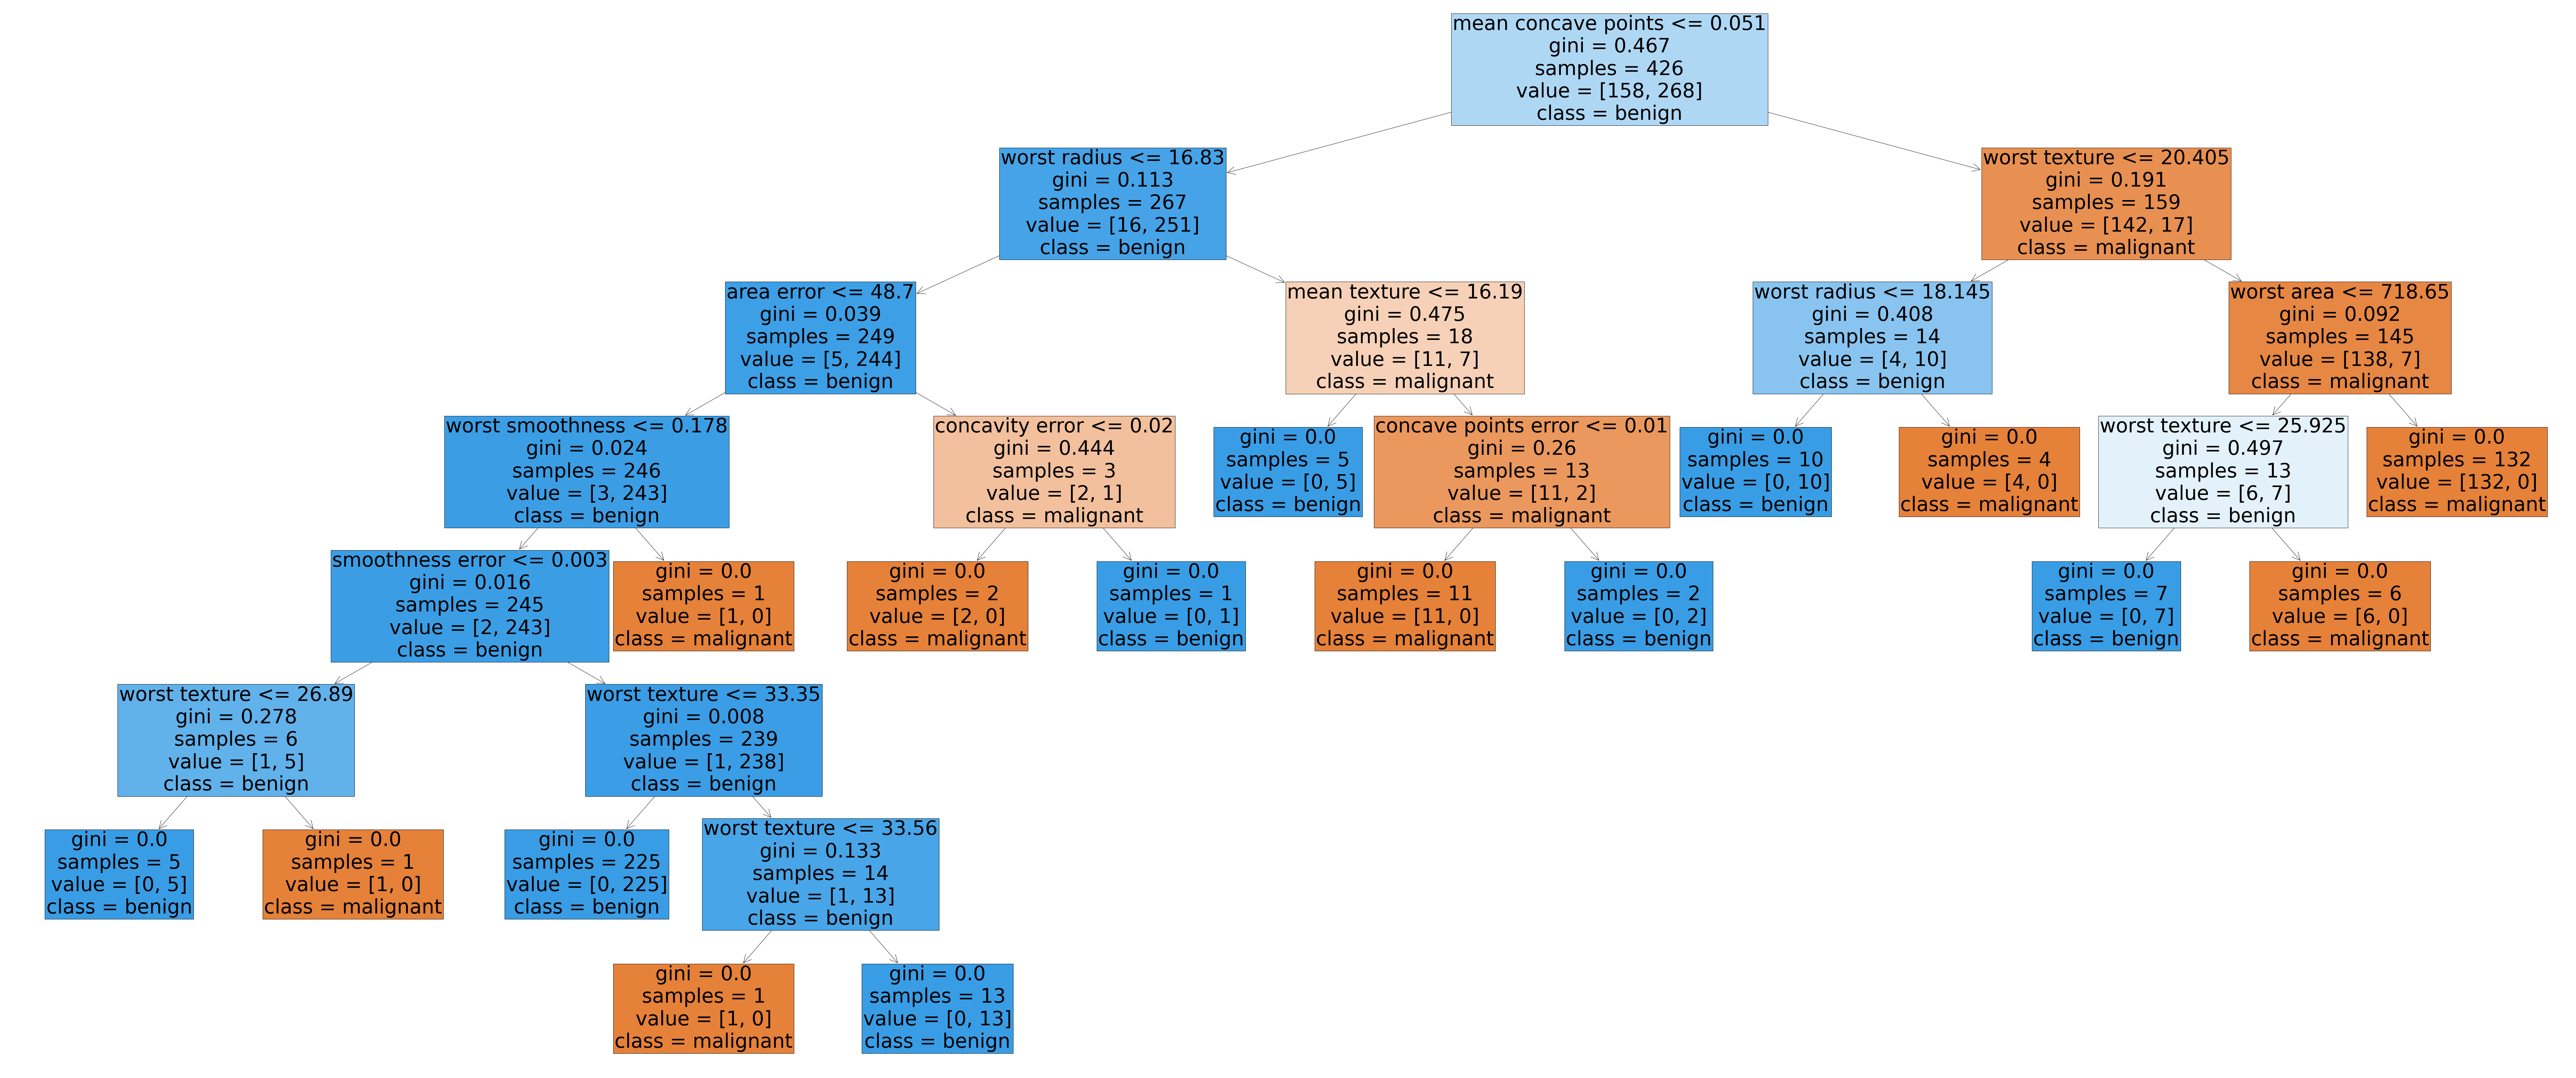

In [14]:
fig = plt.figure(figsize=(140,60))
_ = tree_plt.plot_tree(tree, 
                   feature_names=cancer.feature_names,  
                   class_names=cancer.target_names,
                   filled=True, impurity = 'true', fontsize = 60)

## Voorspellen met de getrainde beslisboom
- Gebruik de beslisboom om te voorspellen wat de aard van de tumoren is. Gebruik hiervoor X_test.
- Hoeveel procent van je voorspellingen is juist?

In [34]:
predictions = tree.predict(X_test)
display('Onze voorspellingen:', predictions[:])
display('De werkelijkheid:', np.array(y_test))
print("Percentage juist voorspeld: {:.2f} ".format( tree.score(X_test, y_test)*100))

'Onze voorspellingen:'

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1])

'De werkelijkheid:'

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1])

Percentage juist voorspeld: 95.10 


## Analyseren van de voorspellingen
- Maak een confusion matrix.
- Hoeveel kwaadaardige tumoren zitten er in de test set?
- Hoeveel daarvan heeft het model gevonden?

De recall score wordt als volgt berekend: het aantal kwaadaardige tumoren in de test set / het aantal gevonden kwaadaardige tumoren.
- Hoe hoog is de recall score?
- Waarom is in deze situatie de recall score van belang?

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


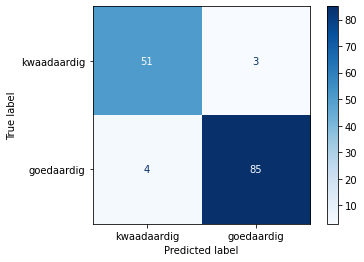

In [35]:
plot_confusion_matrix(tree, X_test, y_test,display_labels=['kwaadaardig', 'goedaardig'], cmap=plt.cm.Blues, normalize=None)
plt.show()